## 1-Day Value at Risk (VaR) Calculation for a Portfolio of Ethereum USD and Ripple USD

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
RISKY_ASSETS = ["ETH-USD", "XRP-USD"]
SHARES = [5, 5]
START_DATE = "2020-01-01"
END_DATE = "2025-01-01"
T =1
N_SIMS = 10 ** 5

In [6]:
df = yf.download(RISKY_ASSETS, start=START_DATE,
                 end=END_DATE)

[*********************100%***********************]  2 of 2 completed


<Axes: title={'center': 'ETH and XRP Daily Returns ($) '}, xlabel='Date'>

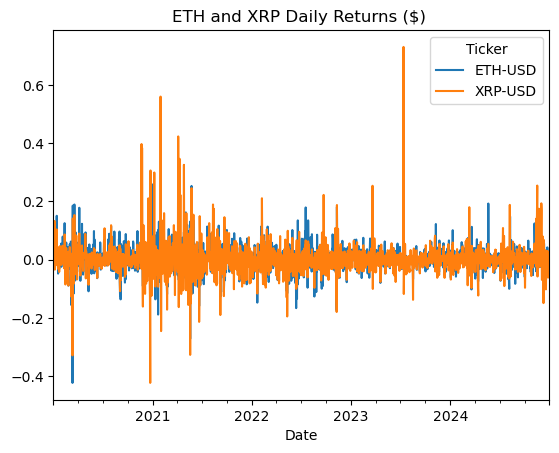

In [7]:
returns = df["Close"].pct_change().dropna()
returns.plot(title="ETH and XRP Daily Returns ($) ")

In [8]:
cov_mat = returns.cov()
chol_mat = np.linalg.cholesky(cov_mat)

In [9]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(
    np.matmul(chol_mat, np.transpose(rv))
)

In [10]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = df["Close"].values[-1, :]
P_0 = np.sum(SHARES * S_0)

In [11]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T +
                   sigma * np.sqrt(T) * correlated_rv)

In [12]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [13]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)
for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: ${-y:.2f}')

1-day VaR with 99.99% confidence: $83.74
1-day VaR with 99.9% confidence: $67.84
1-day VaR with 99.0% confidence: $43.17


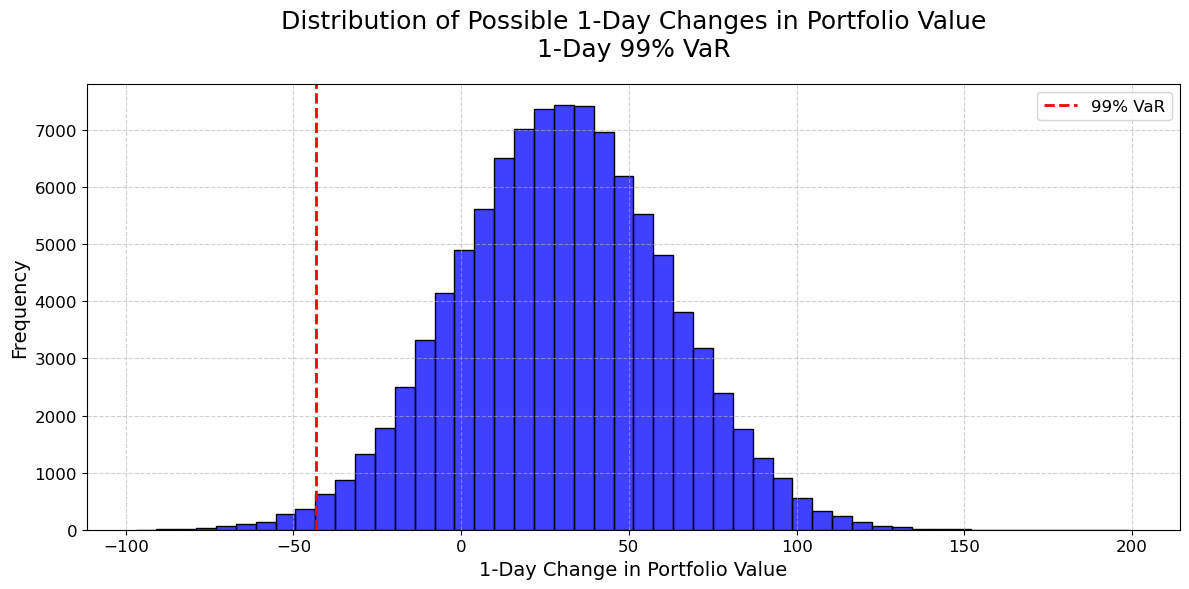

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(P_diff, kde=False, bins=50, color="blue", edgecolor="black")
ax.set_title(
    "Distribution of Possible 1-Day Changes in Portfolio Value\n1-Day 99% VaR",
    fontsize=18,
    pad=20,  
)
ax.set_xlabel("1-Day Change in Portfolio Value", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.axvline(var[2], color="red", linestyle="--", linewidth=2, label="99% VaR")
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(fontsize=12)
ax.tick_params(axis="both", labelsize=12)
plt.tight_layout()  
plt.show()